#### Version of Python: 3.6.9
#### Version of Tensorflow: 2.6.2

## Import of required libraries and functions

In [4]:
import numpy as np

## Preprocess and save and shuffled data (DO NOT run when using provided data)

In [ ]:
from load_datasets import preprocess_USCHAD
from load_datasets import preprocess_RealWorld

windows_users_USCHAD, activity_users_USCHAD= preprocess_USCHAD()   
np.savez("windows_USCHAD_shuffled2", windows_users=np.array(windows_users_USCHAD), activity_users=np.array(activity_users_USCHAD))

windows_users_REAL, activity_users_REAL= preprocess_RealWorld()   
np.savez("windows_RealWorld_shuffled2", windows_users=np.array(windows_users_REAL), activity_users=np.array(activity_users_REAL))


## Invoke method to run SemiFDA, baseline and competitor

In [ ]:
import semiFDA 

semiFDA.run_experiments("windows_RealWorld_shuffled.npz", "windows_USCHAD_shuffled.npz", run_numbers=2, save_title="crossDataset_RealWorld_USCHAD", comm_rounds=10, epochs_server=300, epochs_clients=30, n_user=14, n_tot=14)

## Print and Plot results

Initial Accuracy on Server data:  0.9052723926905465
Initial Accuracy on Clients test data 0.48760765716576127
Final accuracy after fine-tuning of classification head AE-SSFL 0.5151031695329602

Final accuracy SemiFDA 0.7317136338676895

Final accuracy fedAvg 0.8675497688547864


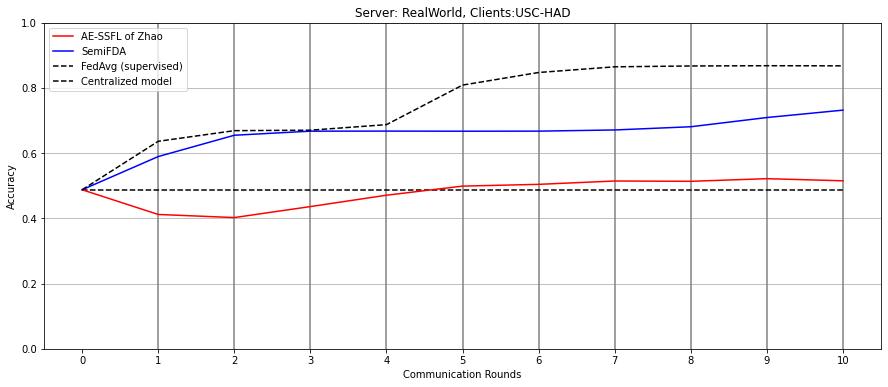

In [1]:
import plot_functions as pf 

pf.print_results("crossDataset_RealWorld_USCHAD_tot", comm_rounds=10)

pf.plot_results("crossDataset_RealWorld_USCHAD_tot", "Server: RealWorld, Clients:USC-HAD", a=0, b=1, comm_rounds=10, bands=False)